# Explore here

In [148]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Cargo los datos
df = pd.read_csv(url)

print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [149]:
df.shape

(1338, 7)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [151]:
df.duplicated().sum()

np.int64(1)

In [152]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [153]:
#Antes había un duplicado ahora ya no
df.duplicated().sum()

np.int64(0)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [155]:
df.age.value_counts()

age
18    69
19    67
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [156]:
df.bmi.value_counts()



bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64

In [157]:
df.children.value_counts()


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [158]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [159]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [160]:
df.charges.value_counts()

charges
29141.36030    1
16884.92400    1
1725.55230     1
4449.46200     1
21984.47061    1
              ..
2775.19215     1
38711.00000    1
35585.57600    1
2198.18985     1
4687.79700     1
Name: count, Length: 1337, dtype: int64

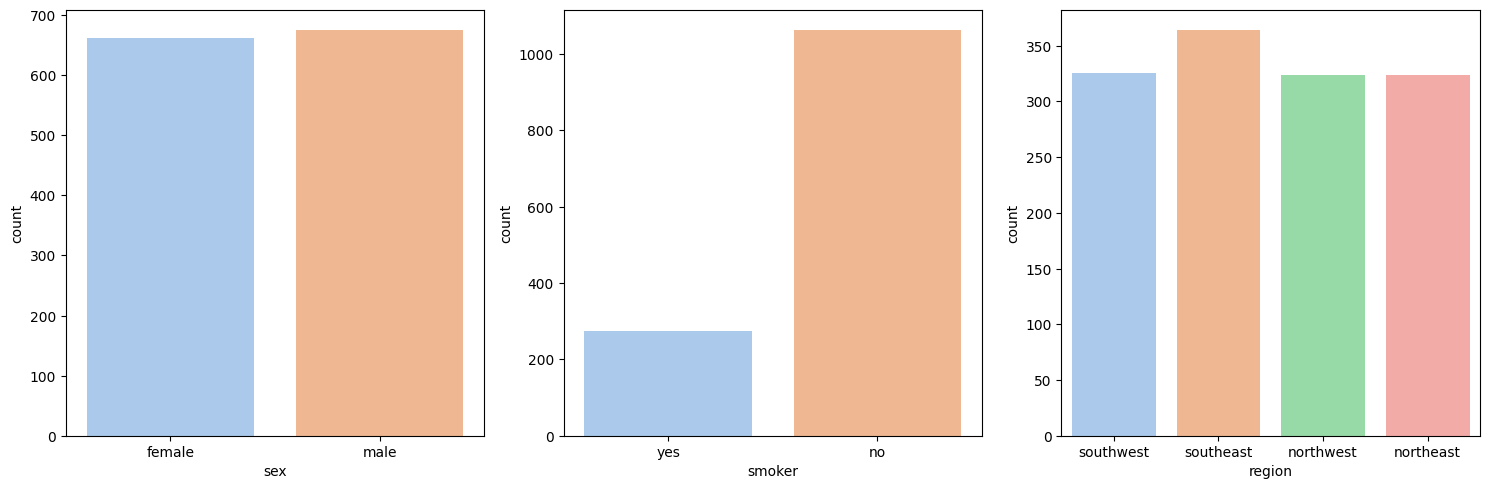

In [161]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axis[0], data=df, x="sex", palette='pastel', hue="sex")
sns.countplot(ax=axis[1], data=df, x="smoker", palette='pastel', hue="smoker")
sns.countplot(ax=axis[2], data=df, x="region", palette='pastel', hue="region")

plt.tight_layout()
plt.show()

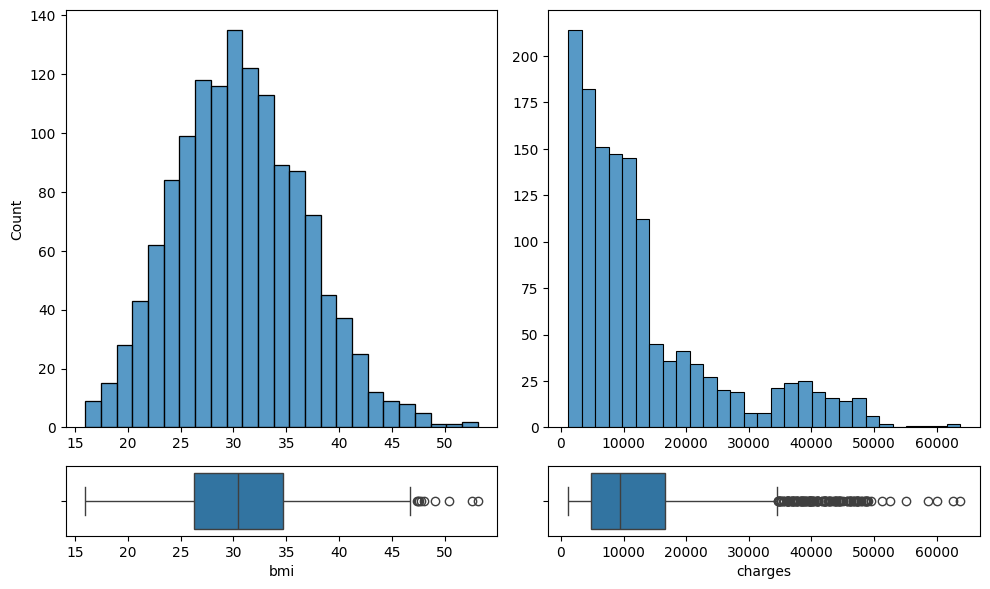

In [162]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax=axis[0, 0], data=df, x="bmi").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="bmi")
sns.histplot(ax=axis[0, 1], data=df, x="charges").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="charges")
plt.tight_layout()
plt.show()

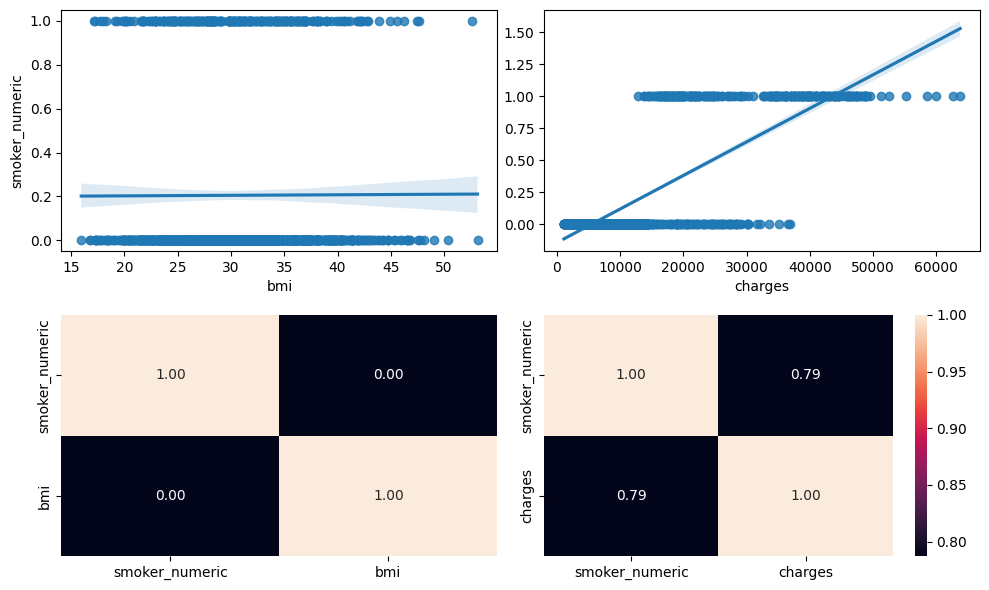

In [163]:
df['smoker_numeric'] = df['smoker'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.regplot(ax=axis[0, 0], data=df, x="bmi", y="smoker_numeric")
sns.heatmap(df[["smoker_numeric", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="charges", y="smoker_numeric").set(ylabel=None)
sns.heatmap(df[["smoker_numeric", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
plt.tight_layout()
plt.show()

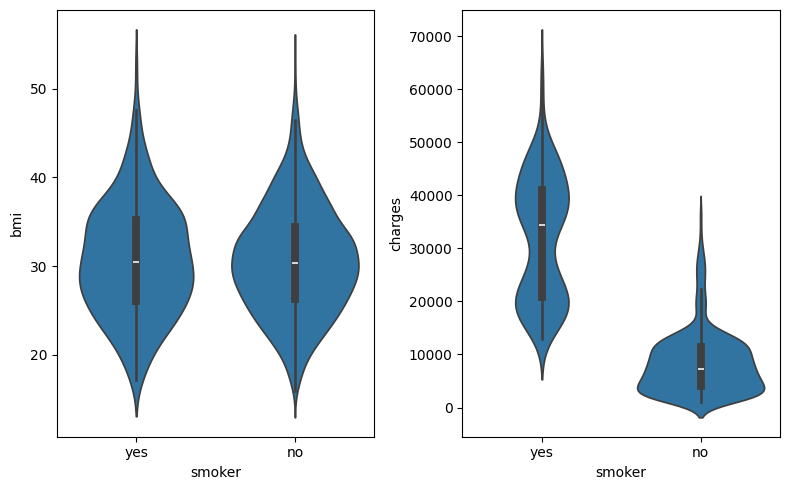

In [164]:
plt.show()

fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(ax=axis[0], x='smoker', y='bmi', data=df)
sns.violinplot(ax=axis[1], x='smoker', y='charges', data=df)

plt.tight_layout()

plt.show()

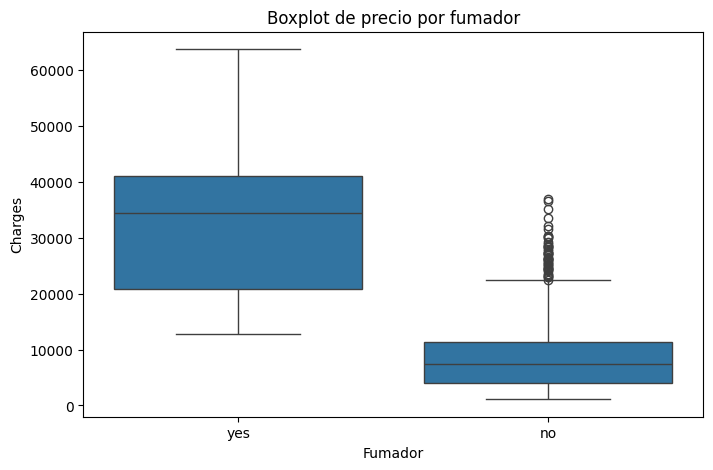

In [165]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='smoker', y='charges', data=df)

plt.title('Boxplot de precio por fumador')
plt.xlabel('Fumador')
plt.ylabel('Charges')
plt.show()

#Claramente se ve una correlación que si eres fumador pagas más de seguro

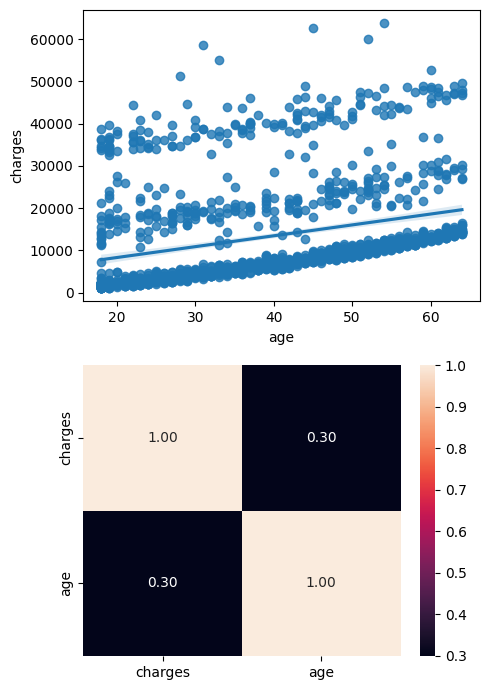

In [166]:
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="age", y="charges")
sns.heatmap(df[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1])

plt.tight_layout()
plt.show()

#También se puede ver que cuanta más edad la gente paga más

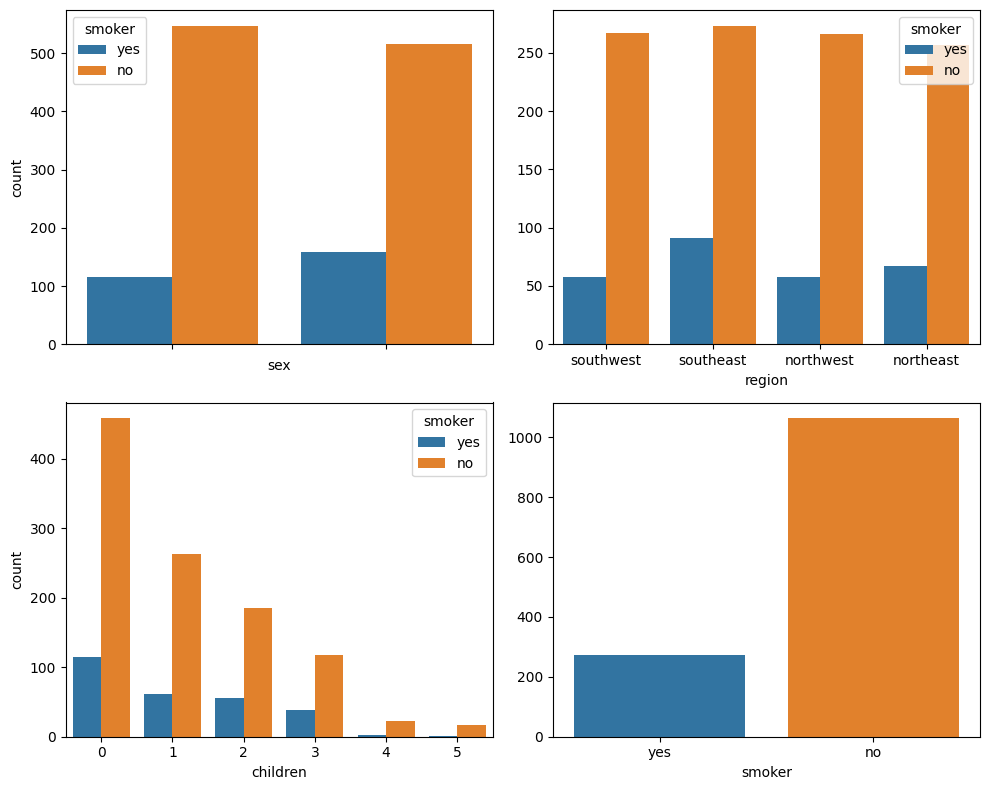

In [167]:
fig, axis = plt.subplots(2, 2, figsize=(10, 8))

sns.countplot(ax=axis[0, 0], data=df, x="sex", hue="smoker").set_xticklabels([])
sns.countplot(ax=axis[0, 1], data=df, x="region", hue="smoker").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="children", hue="smoker")
sns.countplot(ax=axis[1, 1], data=df, x="smoker", hue="smoker").set(ylabel=None)

plt.tight_layout()

plt.show()

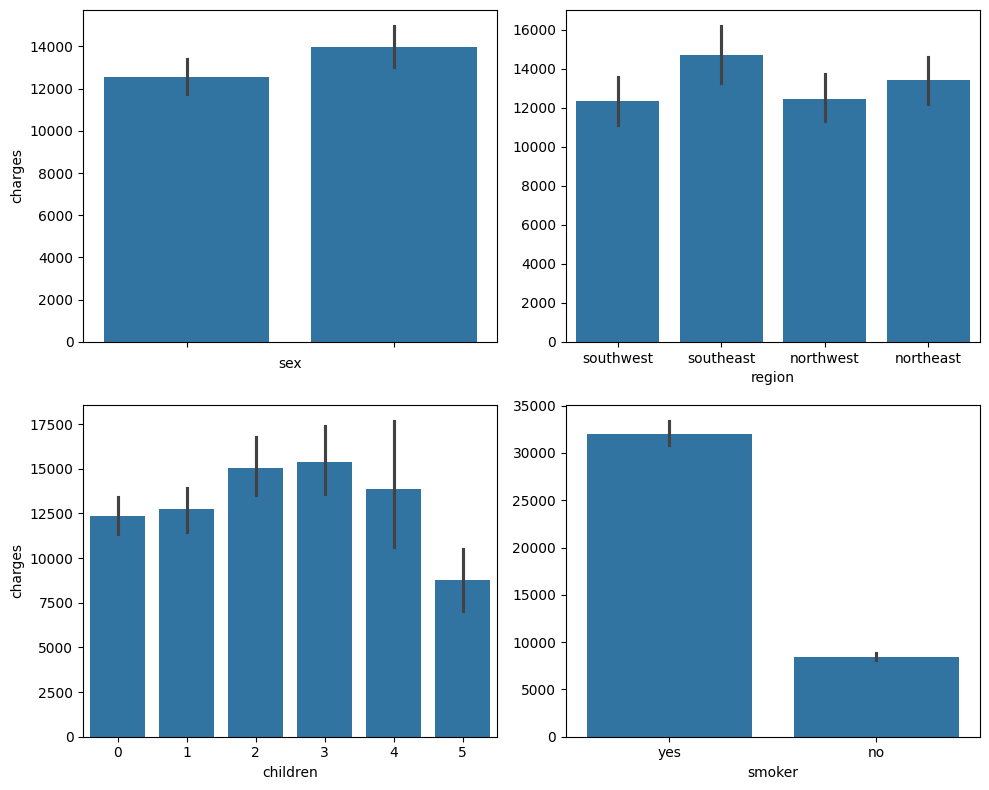

In [168]:
fig, axis = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(ax=axis[0, 0], data=df, x="sex", y="charges").set_xticklabels([])
sns.barplot(ax=axis[0, 1], data=df, x="region", y="charges").set(ylabel=None)
sns.barplot(ax=axis[1, 0], data=df, x="children", y="charges")
sns.barplot(ax=axis[1, 1], data=df, x="smoker", y="charges").set(ylabel=None)

plt.tight_layout()

plt.show()

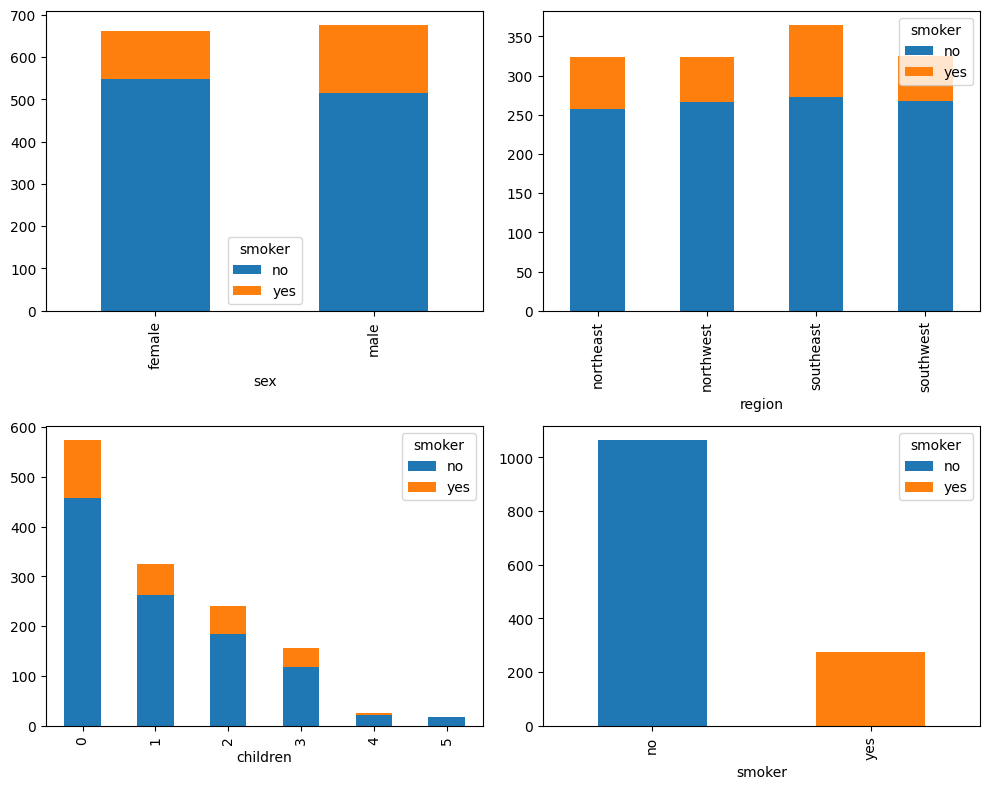

In [169]:
fig, axis = plt.subplots(2, 2, figsize=(10, 8))

crosstab_sex = pd.crosstab(df['sex'], df['smoker'])
crosstab_sex.div(crosstab_sex.sum(1).astype(float), axis=0)
crosstab_sex.plot(kind='bar', stacked=True, ax=axis[0, 0])

crosstab_region = pd.crosstab(df['region'], df['smoker'])
crosstab_region.div(crosstab_region.sum(1).astype(float), axis=0)
crosstab_region.plot(kind='bar', stacked=True, ax=axis[0, 1])

crosstab_children = pd.crosstab(df['children'], df['smoker'])
crosstab_children.div(crosstab_children.sum(1).astype(float), axis=0)
crosstab_children.plot(kind='bar', stacked=True, ax=axis[1, 0])

crosstab_smoker = pd.crosstab(df['smoker'], df['smoker'])
crosstab_smoker.div(crosstab_smoker.sum(1).astype(float), axis=0)
crosstab_smoker.plot(kind='bar', stacked=True, ax=axis[1, 1])

plt.tight_layout()

plt.show()

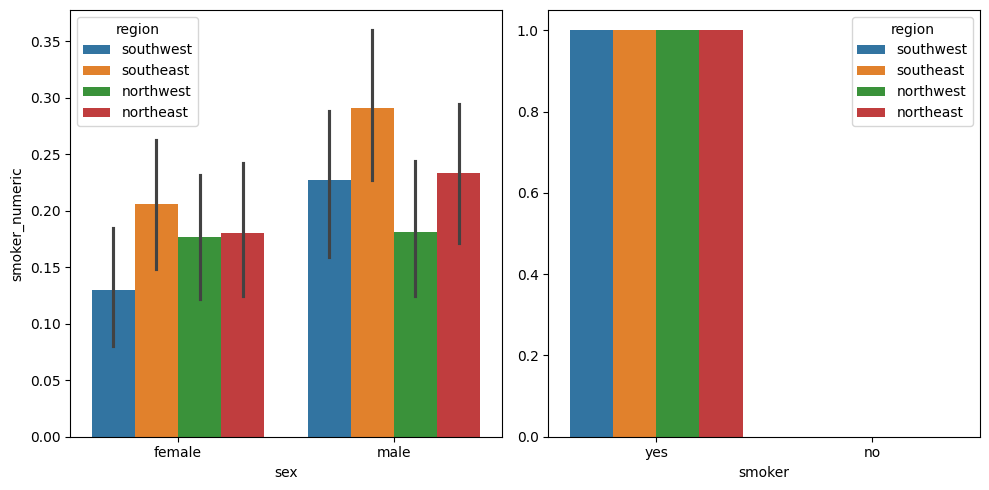

In [170]:
df['smoker_numeric'] = df['smoker'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.barplot(ax=axis[0], data=df, x="sex", y="smoker_numeric", hue="region")
sns.barplot(ax=axis[1], data=df, x="smoker", y="smoker_numeric", hue="region").set(ylabel=None)

plt.tight_layout()

plt.show()

In [171]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

In [172]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,2


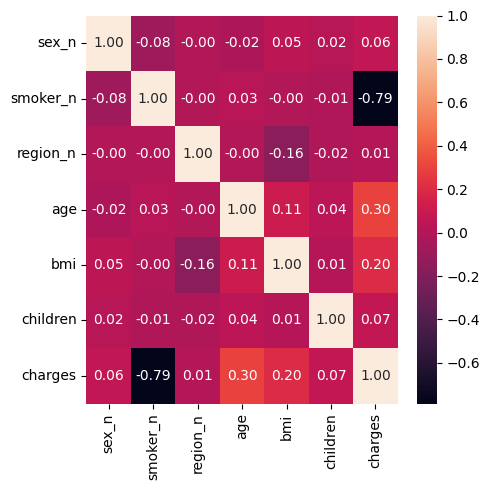

In [173]:
fig, axis = plt.subplots(figsize=(5, 5))

sns.heatmap(df[["sex_n", "smoker_n", "region_n", "age", "bmi", "children", "charges"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

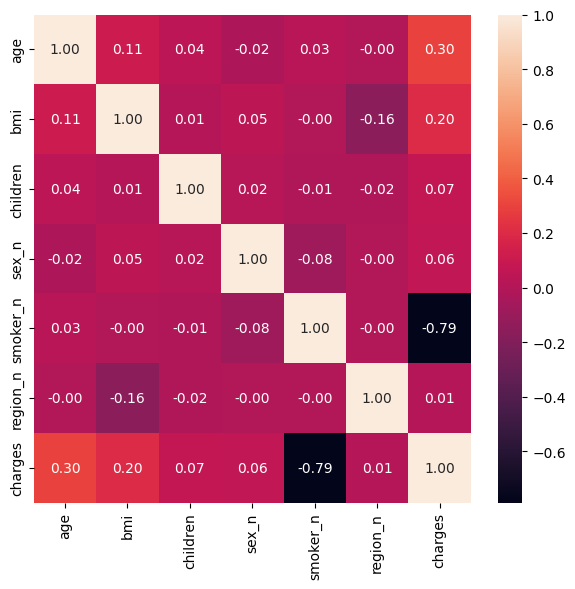

In [174]:
fig, axis = plt.subplots(figsize=(6, 6))

sns.heatmap(df[["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

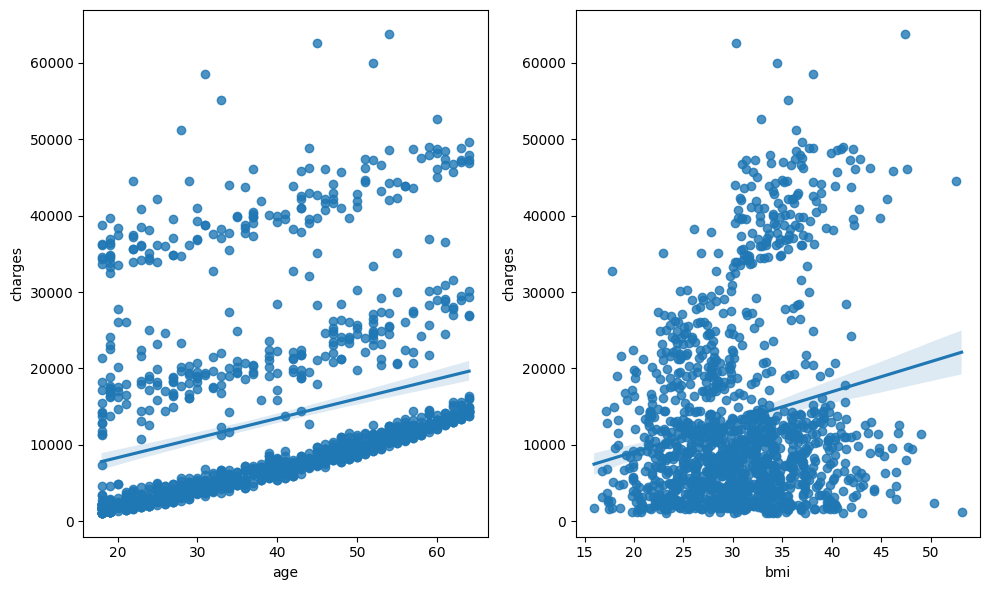

In [175]:
fig, axis = plt.subplots(figsize=(10, 6), ncols=2)

sns.regplot(ax=axis[0], data=df, x="age", y="charges")
sns.regplot(ax=axis[1], data=df, x="bmi", y="charges")

plt.tight_layout()

plt.show()

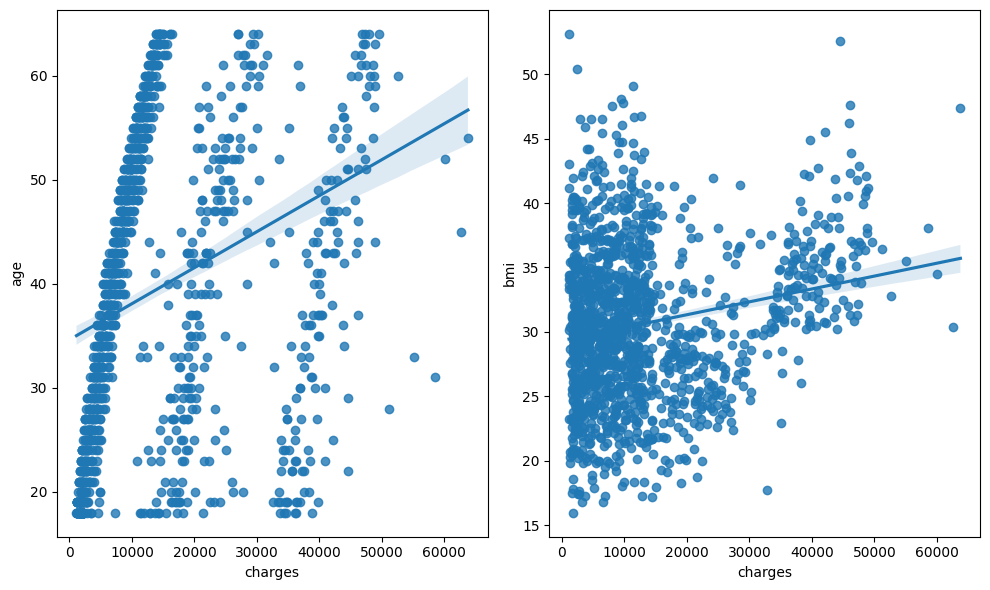

In [176]:
fig, axis = plt.subplots(figsize=(10, 6), ncols=2)

sns.regplot(ax=axis[0], data=df, x="charges", y="age")
sns.regplot(ax=axis[1], data=df, x="charges", y="bmi")

plt.tight_layout()

plt.show()

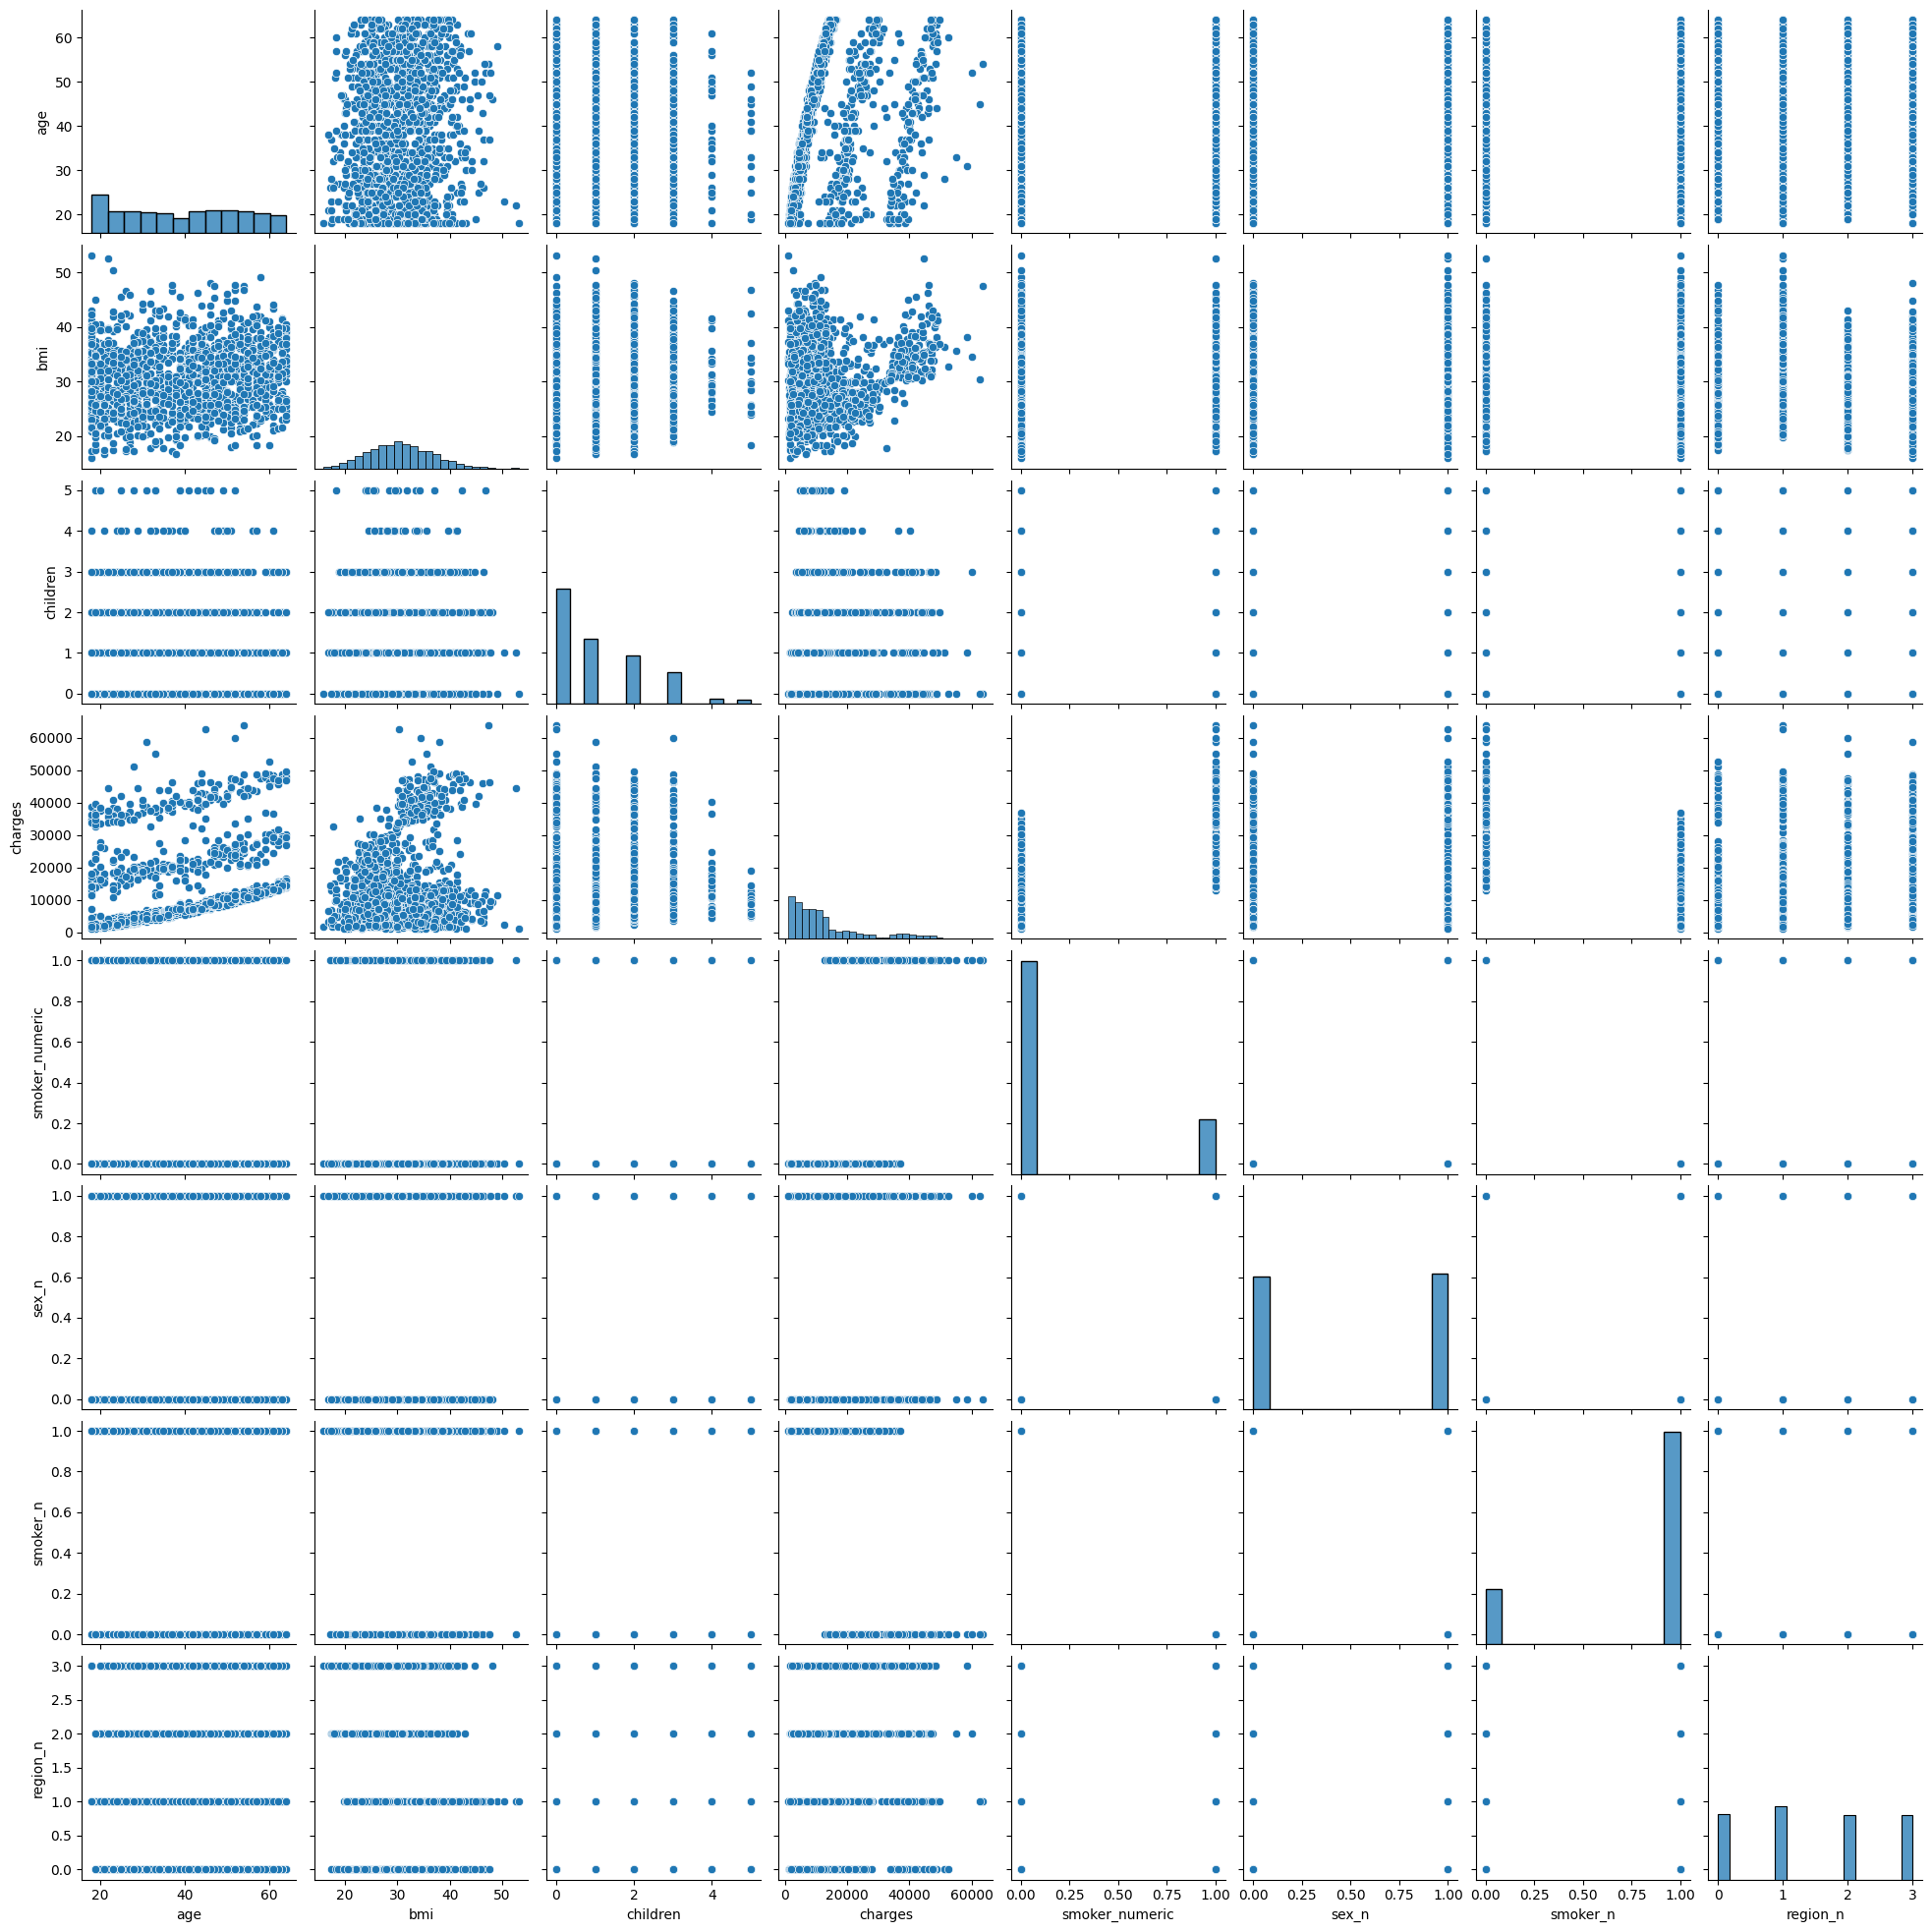

In [177]:
sns.pairplot(data = df)

In [178]:
df.describe()

,age,bmi,children,charges,smoker_numeric,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.204936,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.403806,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,0.000000,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,0.000000,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,3.000000


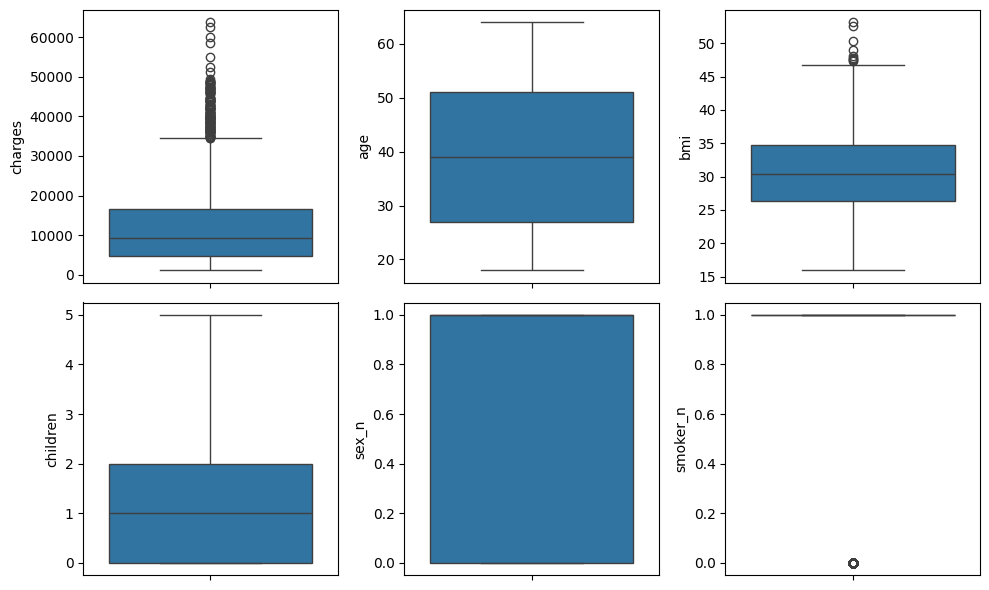

In [179]:
fig, axis = plt.subplots(2, 3, figsize=(10, 6))

sns.boxplot(ax=axis[0, 0], data=df, y="charges")
sns.boxplot(ax=axis[0, 1], data=df, y="age")
sns.boxplot(ax=axis[0, 2], data=df, y="bmi")
sns.boxplot(ax=axis[1, 0], data=df, y="children")
sns.boxplot(ax=axis[1, 1], data=df, y="sex_n")
sns.boxplot(ax=axis[1, 2], data=df, y="smoker_n")

plt.tight_layout()

plt.show()

In [180]:
charges_est = df["charges"].describe()
print(charges_est)

iqr = charges_est["75%"] - charges_est["25%"]
upper_limit = charges_est["75%"] + 1.5 * iqr
lower_limit = charges_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

#Eliminamos valores menores de 0
df = df[df["charges"] > 0]

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [181]:
charguitos = df[df["charges"] > 0].shape[0]
print("Valores mayores de 0: ", charguitos)

Valores mayores de 0:  1337


In [182]:
age_est = df["age"].describe()
print(age_est)

iqr = age_est["75%"] - age_est["25%"]
upper_limit = age_est["75%"] + 1.5 * iqr
lower_limit = age_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 87.0 y -9.0, con un rango intercuartílico de 24.0


In [183]:
df = df[df["age"] > 0]

age_val = df[df["age"] > 65].shape[0]
print("Valores mayores de 0: ", age_val)
#No hay valores mayores que 65

Valores mayores de 0:  0


In [184]:

bmi_est = df["bmi"].describe()
print(bmi_est)

iqr = bmi_est["75%"] - bmi_est["25%"]
upper_limit = bmi_est["75%"] + 1.5 * iqr
lower_limit = bmi_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [185]:

df = df[df["bmi"] > 0]

In [186]:

bmi_val = df[df["bmi"] > 0].shape[0]
print("Valores mayores de 0: ", bmi_val)

children_est = df["children"].describe()
print(children_est)

iqr = children_est["75%"] - children_est["25%"]
upper_limit = children_est["75%"] + 1.5 * iqr
lower_limit = children_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Valores mayores de 0:  1337
count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 5.0 y -3.0, con un rango intercuartílico de 2.0


In [187]:

df = df[df["children"] >= 0]

children_val = df[df["children"] >= 0].shape[0]
print("Valores mayores o iguales a 0: ", children_val)

Valores mayores o iguales a 0:  1337


In [188]:

df = df

In [189]:
df.isnull().sum().sort_values(ascending=False)

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
smoker_numeric    0
sex_n             0
smoker_n          0
region_n          0
dtype: int64

In [190]:
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,0.021739,0.321227,0.0,0.0,0.0,0.000000
1,0.000000,0.479150,0.2,1.0,1.0,0.333333
2,0.217391,0.458434,0.6,1.0,1.0,0.333333
3,0.326087,0.181464,0.0,1.0,1.0,0.666667
4,0.304348,0.347592,0.0,1.0,1.0,0.666667


In [192]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(score_func=f_regression, k=4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [193]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [143]:
X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [194]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [195]:
#Empezamos el modelo de regresión
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,2396.09590
1,0.065217,0.263250,0.4,1.0,3279.86855
2,0.739130,0.580172,0.4,1.0,33471.97189
3,0.978261,0.686306,0.0,1.0,13405.39030
4,0.630435,0.286252,0.4,1.0,9715.84100


In [197]:


# Modelo de regresión
model = LinearRegression()

# Lo entrenamos
model.fit(X_train, y_train)

# Predecimos
y_pred = model.predict(X_test)

# Evaluamos

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regresión Lineal - Resultados:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")

Regresión Lineal - Resultados:
Error Cuadrático Medio (MSE): 35493102.61165052
Coeficiente de Determinación (R2): 0.8068466322629111


In [198]:
y_pred = model.predict(X_test)
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [200]:
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Características seleccionadas:", selected_features)

# Mejoramos el modelo con las caracteristicas seleccionadas
model.fit(X_train[selected_features], y_train)
y_pred_rfe = model.predict(X_test[selected_features])

mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print("\nRegresión lineal seleccionando - Resultados:")
print(f"MSE: {mse_rfe}")
print(f"R2: {r2_rfe}")
#Los modelos de regresión lineales no usan hiperparámetros para optimizar por lo que tendremos que usar otro modelo como el regularizado del siguiente proyecto.

Características seleccionadas: Index(['age', 'bmi', 'children', 'smoker_n', 'region_n'], dtype='object')

Regresión lineal seleccionando - Resultados:
MSE: 35506758.213351294
R2: 0.8067723185156505
